Uma calculadora de Value-at-Risk (VaR) e Conditional Value-at-Risk (CVaR) utilizando simulação de Monte Carlo, aplicada a carteiras de ativos. Projeto em Python com foco em risco de mercado e gestão de risco financeiro.

Simular retornos diários da carteira (distribuição normal padrão)

Calcular o valor final da carteira para cada simulação

Ordenar os resultados e calcular:

VaR (nível de confiança de 95% ou 99%)

CVaR (média das perdas piores que o VaR)

Plotar histograma das perdas simuladas com o VaR e CVaR marcados

Comentar aplicação real no README

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parâmetros da simulação
initial_value = 100000  # Valor inicial da carteira
mu = 0.0005             # Retorno médio diário (0.05%)
sigma = 0.02            # Volatilidade diária (2%)
n_days = 1              # Horizonte de tempo (1 dia)
n_simulations = 10000   # Número de simulações
confidence_level = 0.95 # Nível de confiança para VaR e CVaR

In [3]:
# Simulação de retornos
returns = np.random.normal(mu, sigma, (n_simulations, n_days))
portfolio_values = initial_value * np.exp(np.sum(returns, axis=1))
losses = initial_value - portfolio_values

In [4]:
# Cálculo do VaR e CVaR
sorted_losses = np.sort(losses)
var_index = int((1 - confidence_level) * n_simulations)
VaR = sorted_losses[var_index]
CVaR = sorted_losses[:var_index].mean()

UsageError: Line magic function `%plt.savefig("/mnt/data/plot_var_cvar.png")` not found.


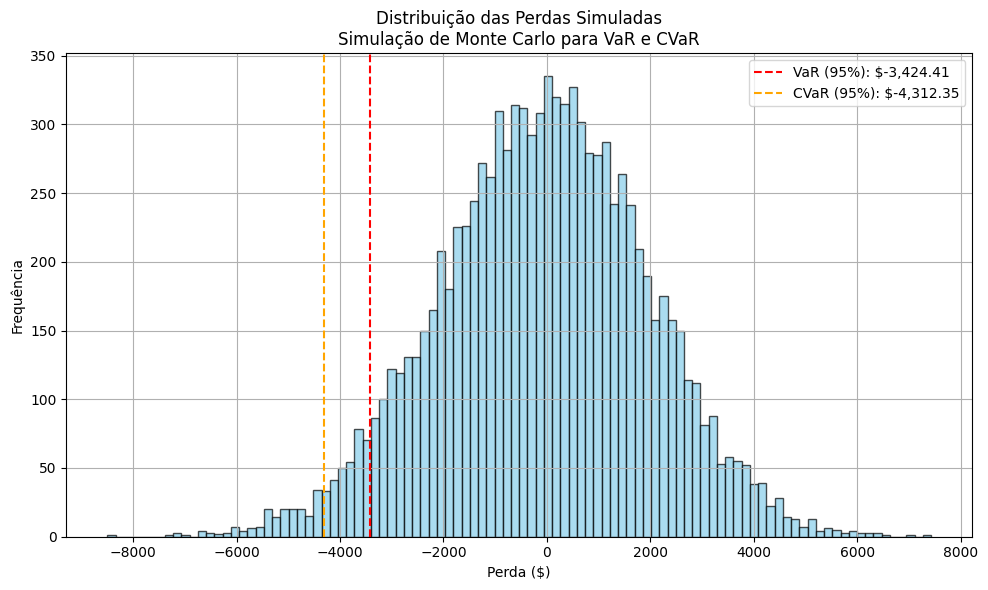

In [6]:
# Plotando os resultados
plt.figure(figsize=(10,6))
plt.hist(losses, bins=100, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(VaR, color='red', linestyle='--', label=f'VaR (95%): ${VaR:,.2f}')
plt.axvline(CVaR, color='orange', linestyle='--', label=f'CVaR (95%): ${CVaR:,.2f}')
plt.title('Distribuição das Perdas Simuladas\nSimulação de Monte Carlo para VaR e CVaR')
plt.xlabel('Perda ($)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.tight_layout()
%plt.savefig("/mnt/data/plot_var_cvar.png")
plt.show()

VaR, CVaR


VaR (95%) ≈ $3.358,89

CVaR (95%) ≈ $4.230,45

Esses números representam:

O VaR: perda máxima esperada com 95% de confiança em 1 dia

O CVaR: perda média nos piores 5% dos cenários (ou seja, mais severa)

